In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **SeoulBikeData Processing (From Assignment 1)**

### **Data Processing**

In [2]:
dataset = pd.read_csv("/content/SeoulBikeData.csv",encoding='latin1') 
dataset.head(3) # view the data
# dataset.dtypes

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
X = dataset.iloc[:, 2:-1].values #drop date and Rent Bike Count
y = dataset.iloc[:, -1].values

In [4]:
print(X[0,:])

[0 -5.2 37 2.2 2000 -17.6 0.0 0.0 0.0 'Winter' 'No Holiday']


Encoding the Independent Variable

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1,-2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
print(X[0,:]) # 15 Variables

[0.0 1.0 0.0 0.0 0.0 1.0 0 -5.2 37 2.2 2000 -17.6 0.0 0.0 0.0]


Encoding the Dependent Variable

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
import collections, numpy
collections.Counter(y)

Counter({0: 295, 1: 8465})

Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
# Sample 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)

(6132,) (6132, 15) (2628,) (2628, 15)


Feature Scaling (Not necessary but the result will be better)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# ready X_train, X_test, y_train, y_test

In [12]:
# Sample 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state = 5) # Change train and test set
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)
# ready X_train2, X_test2, y_train2, y_test2

## **Support Vector Machine**

### **Training the SVM model on the Training set Kernel Function 1 (rbf)**

In [13]:
import time
tStart = time.time()

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training sample 1 Confusion Matrix (SVM rbf)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
# In sample1 error
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[   0  198]
 [   0 5934]]
Accuracy: 96.77 %


Applying k-Fold Cross Validation(SVM rbf)

In [16]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
# print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
# Accuracy: 0.9881 (+/- 0.0036)

Accuracy: 96.77 %
Standard Deviation: 0.06 %


In [17]:
tEnd = time.time()
print(tEnd - tStart)

2.998196601867676


Predicting the Test set results(rbf)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
# Out sample error 1
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[   0   97]
 [   0 2531]]
Accuracy: 96.31 %


### **Training the SVM model on the Training set Kernel Function 2 (sigmoid)**


In [20]:
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training set results and Confusion Matrix (SVM sigmoid)

In [21]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[   0  198]
 [  24 5910]]
Accuracy: 96.38 %


Applying k-Fold Cross Validation(SVM sigmoid)

In [22]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.89 %
Standard Deviation: 0.48 %


Testing set results and Confusion Matrix (SVM sigmoid)

In [23]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[   0   97]
 [  15 2516]]
Accuracy: 95.74 %


### **Training the SVM model on the Training set Kernel Function 3 (poly)**

In [24]:
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training set results and Confusion Matrix (SVM poly)

In [25]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[  15  183]
 [   2 5932]]
Accuracy: 96.98 %


Applying k-Fold Cross Validation(SVM poly)

In [26]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.85 %
Standard Deviation: 0.19 %


Testing set results and Confusion Matrix (SVM poly)

In [27]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[   2   95]
 [   5 2526]]
Accuracy: 96.19 %


## **Decision Tree**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # Change train and test set
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# Tree ready X_train, X_test, y_train, y_test

### **First Tree**

Training the Decision Tree Classification model on the Training set

In [29]:
tStart = time.time()

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = DecisionTreeClassifier(criterion = 'entropy',splitter='best',max_depth = 6, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[   2   95]
 [   4 2527]]
Accuracy: 96.23 %


In [31]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[  12  186]
 [   2 5932]]
Accuracy: 96.93 %


Applying k-Fold Cross Validation(Decision Tree)

In [32]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.67 %
Standard Deviation: 0.24 %


0.40844011306762695


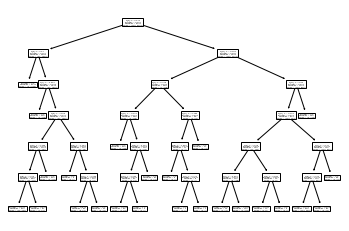

In [33]:
tree.plot_tree(classifier) 
tEnd = time.time()
print(tEnd - tStart)

### **Second Tree**

Training the Decision Tree Classification model on the Training set

In [34]:
tStart2 = time.time()

In [35]:
classifier = DecisionTreeClassifier(criterion = 'entropy',splitter='best',random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[  36   61]
 [  46 2485]]
Accuracy: 95.93 %


In [36]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[ 198    0]
 [   0 5934]]
Accuracy: 100.00 %


Applying k-Fold Cross Validation(Decision Tree)

In [37]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.84 %
Standard Deviation: 0.65 %


0.7791218757629395


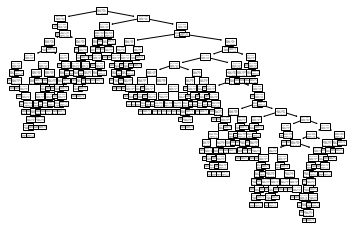

In [38]:
tStart = time.time()
tree.plot_tree(classifier) 
tEnd = time.time()
print(tEnd - tStart)

In [39]:
accuracies = cross_val_score(estimator = classifier,X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.94 %
Standard Deviation: 1.08 %


In [40]:
tEnd2 = time.time()
print(tEnd2 - tStart2)

11.516032218933105


## **Boosting (AdaBoost)**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # Change train and test set
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# Tree ready X_train, X_test, y_train, y_test

Training AdaBoost on the Training set

In [42]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training set results and Confusion Matrix

In [43]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[   2  196]
 [   4 5930]]
Accuracy: 96.74 %


Applying k-Fold Cross Validation

In [44]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.54 %
Standard Deviation: 0.19 %


Making the Confusion Matrix

In [45]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[   1   96]
 [   0 2531]]
Accuracy: 96.35 %


In [46]:
accuracies = cross_val_score(estimator = classifier,X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.89 %
Standard Deviation: 0.48 %


# **IBM HR Dataset Processing**

### **Data Processing**

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import collections, numpy
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder

In [48]:
dataset = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv") 
dataset.head(3) # view the data
# dataset.dtypes


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [49]:
# dataset.isnull().sum() # check the Missing Data

In [50]:
# dataset.dtypes #PerformanceRating

In [51]:
dataset = dataset.drop(['PercentSalaryHike'], axis=1) 
dataset.head(3) # view the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,3,2,80,0,7,3,3,0,0,0,0


In [52]:
PerformanceRating = dataset['PerformanceRating']
dataset.drop(labels=['PerformanceRating'], axis=1, inplace = True)
dataset.insert(0, 'PerformanceRating', PerformanceRating)
dataset.head(3)

,PerformanceRating,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,1,80,0,8,0,1,6,4,0,5
1,4,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,2,80,0,7,3,3,0,0,0,0


In [53]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [54]:
print(X[0])
print(y)

[41 'Yes' 'Travel_Rarely' 1102 'Sales' 1 2 'Life Sciences' 1 1 2 'Female'
 94 3 2 'Sales Executive' 4 'Single' 5993 19479 8 'Y' 'Yes' 1 80 0 8 0 1 6
 4 0 5]
[3 4 3 ... 4 3 3]


In [55]:
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(), [1,2,4,7,11,15,21,22,17])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[0])

[1.0 2.0 2.0 1.0 0.0 7.0 0.0 1.0 2.0 41 1102 1 2 1 1 2 94 3 2 4 5993 19479
 8 1 80 0 8 0 1 6 4 0 5]


Encoding the Dependent Variable

In [56]:
le = LabelEncoder()
y = le.fit_transform(y)
print(collections.Counter(y)) # 3 is 1244(0), 4 is 226(1), check whether is binary classification.
print(y)

Counter({0: 1244, 1: 226})
[0 1 0 ... 1 0 0]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 33) (441, 33) (1029,) (441,)


## **Support Vector Machine**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Training the SVM model on the Training set Kernel Function 1 (rbf)**

In [59]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training set results and Confusion Matrix (SVM rbf)

In [60]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[870   0]
 [159   0]]
Accuracy: 84.55 %


Applying k-Fold Cross Validation(SVM rbf)

In [61]:
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.55 %
Standard Deviation: 0.25 %


Testing set results and Confusion Matrix (SVM rbf)

In [62]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[374   0]
 [ 67   0]]
Accuracy: 84.81 %


### **Training the SVM model on the Training set Kernel Function 2 (sigmoid)**


In [63]:
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training set results and Confusion Matrix (SVM sigmoid)

In [64]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[861   9]
 [159   0]]
Accuracy: 83.67 %


Applying k-Fold Cross Validation(SVM sigmoid)

In [65]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.65 %
Standard Deviation: 0.71 %


Testing set results and Confusion Matrix (SVM sigmoid)

In [66]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[373   1]
 [ 67   0]]
Accuracy: 84.58 %


### **Training the SVM model on the Training set Kernel Function 3 (poly)**

In [67]:
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training set results and Confusion Matrix (SVM poly)

In [68]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[870   0]
 [114  45]]
Accuracy: 88.92 %


Applying k-Fold Cross Validation(SVM poly)

In [69]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.35 %
Standard Deviation: 0.66 %


Testing set results and Confusion Matrix (SVM poly)

In [70]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[371   3]
 [ 67   0]]
Accuracy: 84.13 %


## **Decision Tree**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # Change train and test set

### **First Tree**

In [72]:
classifier = DecisionTreeClassifier(criterion = 'entropy',splitter='best', random_state = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[312  62]
 [ 56  11]]
Accuracy: 73.24 %


In [73]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[870   0]
 [  0 159]]
Accuracy: 100.00 %


In [74]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.89 %
Standard Deviation: 2.97 %


[Text(99.23593352214868, 211.04470588235293, 'X[17] <= 1.5\nentropy = 0.621\nsamples = 1029\nvalue = [870, 159]'),
 Text(10.909979633401223, 198.25411764705882, 'X[22] <= 4.5\nentropy = 0.856\nsamples = 57\nvalue = [41, 16]'),
 Text(8.182484725050918, 185.4635294117647, 'X[20] <= 2300.0\nentropy = 0.925\nsamples = 47\nvalue = [31, 16]'),
 Text(5.4549898167006114, 172.6729411764706, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(10.909979633401223, 172.6729411764706, 'X[31] <= 0.5\nentropy = 0.965\nsamples = 41\nvalue = [25, 16]'),
 Text(5.4549898167006114, 159.88235294117646, 'X[11] <= 7.5\nentropy = 0.918\nsamples = 15\nvalue = [5, 10]'),
 Text(2.7274949083503057, 147.09176470588235, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(8.182484725050918, 147.09176470588235, 'X[8] <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(5.4549898167006114, 134.30117647058825, 'X[12] <= 2.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(2.7274949083503057, 121.5105882

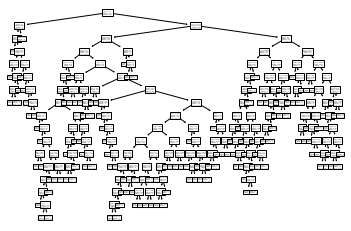

In [75]:
tree.plot_tree(classifier) 

### **Second Tree**

Training the Decision Tree Classification model on the Training set

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
classifier = DecisionTreeClassifier(criterion = 'entropy',splitter='best',max_depth = 6, random_state = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[348  26]
 [ 66   1]]
Accuracy: 79.14 %


In [77]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[859  11]
 [118  41]]
Accuracy: 87.46 %


Applying k-Fold Cross Validation(Decision Tree)

In [78]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.28 %
Standard Deviation: 2.10 %


[Text(106.40585106382979, 201.90857142857143, 'X[17] <= 1.5\nentropy = 0.621\nsamples = 1029\nvalue = [870, 159]'),
 Text(28.493617021276595, 170.84571428571428, 'X[22] <= 4.5\nentropy = 0.856\nsamples = 57\nvalue = [41, 16]'),
 Text(21.370212765957447, 139.78285714285715, 'X[20] <= 2300.0\nentropy = 0.925\nsamples = 47\nvalue = [31, 16]'),
 Text(14.246808510638298, 108.72, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(28.493617021276595, 108.72, 'X[31] <= 0.5\nentropy = 0.965\nsamples = 41\nvalue = [25, 16]'),
 Text(14.246808510638298, 77.65714285714284, 'X[11] <= 7.5\nentropy = 0.918\nsamples = 15\nvalue = [5, 10]'),
 Text(7.123404255319149, 46.59428571428572, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(21.370212765957447, 46.59428571428572, 'X[8] <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(14.246808510638298, 15.531428571428563, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(28.493617021276595, 15.531428571428563, 'entropy = 0.0\nsamples = 4

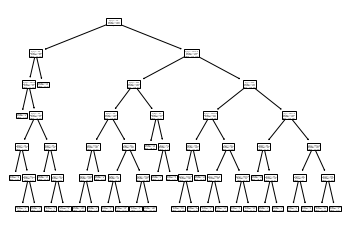

In [79]:
tree.plot_tree(classifier) 

## **Boosting Decision trees (AdaBoost)**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # Change train and test set
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)
# Tree ready X_train, X_test, y_train, y_test

In [81]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 33) (441, 33) (1029,) (441,)


Training AdaBoost on the Training set

In [82]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training set results and Confusion Matrix

In [83]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[863   7]
 [154   5]]
Accuracy: 84.35 %


Applying k-Fold Cross Validation

In [84]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.80 %
Standard Deviation: 1.22 %


Making the Confusion Matrix

In [85]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[363  11]
 [ 67   0]]
Accuracy: 82.31 %


# IBM All Columes

In [86]:
dataset = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
PerformanceRating = dataset['PerformanceRating']
dataset.drop(labels=['PerformanceRating'], axis=1, inplace = True)
dataset.insert(0, 'PerformanceRating', PerformanceRating)
dataset.head(3)

,PerformanceRating,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,1,80,0,8,0,1,6,4,0,5
1,4,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,2,80,0,7,3,3,0,0,0,0


In [87]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(), [1,2,4,7,11,15,21,22,17])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
le = LabelEncoder()
y = le.fit_transform(y)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
classifier = DecisionTreeClassifier(criterion = 'entropy',splitter='best', random_state = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

[[374   0]
 [  0  67]]
Accuracy: 100.00 %


In [89]:
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [90]:
y_pred_in = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_in)
print(cm)
print("Accuracy: {:.2f} %".format(accuracy_score(y_train, y_pred_in)*100))

[[870   0]
 [  0 159]]
Accuracy: 100.00 %


[Text(167.4, 163.07999999999998, 'X[23] <= 19.5\nentropy = 0.621\nsamples = 1029\nvalue = [870, 159]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 870\nvalue = [870, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 159\nvalue = [0, 159]')]

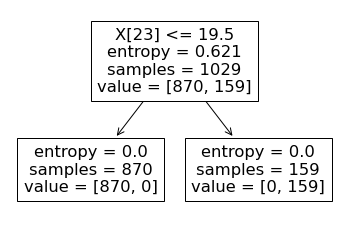

In [91]:
tree.plot_tree(classifier) 